# Breast Cancer Data Analysis and Predictions

###  Breast Cancer

# 1. Exploratory Data Analysis

## 1.1 Understanding the data

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
from google.colab import files

In [ ]:
# Prompt user to upload the file
uploaded = files.upload()

# Assume the file is named 'data.csv'
file_name = 'data.csv'

# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print(df.head())

Saving data.csv to data.csv
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_w

In [ ]:
# displaying first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# shape of the dataframe
df.shape

(569, 33)

In [ ]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

The whole column 'Unamed: 32' has NaN values.

In [ ]:
# dropping 'Unnamed: 32' column.
df.drop("Unnamed: 32", axis=1, inplace=True)

In [ ]:
# dropping id column
df.drop('id',axis=1, inplace=True)

In [ ]:
# descriptive statistics of data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 1.2. Data Visualizations

<ipython-input-11-66acbccb5508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=df, palette='magma')


<Axes: xlabel='diagnosis', ylabel='count'>

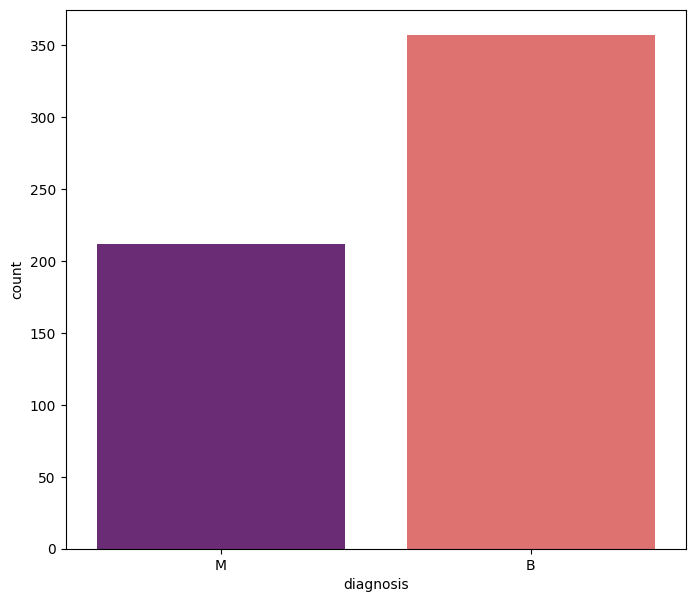

In [ ]:
# countplot
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

From the heatmap, we can observe from the heatmaps that there are many negative correlations in this dataset.

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

# 2. Data Preprocessing and Building Models

## 2.1 Data Preprocessing

In [ ]:
# counts of unique rows in the 'diagnosis' column
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


## 2.2 Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Random Forest Model Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Model Results:
Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# Convert X_train from NumPy array to Pandas DataFrame
X_train_df = pd.DataFrame(X_train)

# Now use X_train_df instead of X_train
feature_importance = pd.DataFrame({
    'feature': X_train_df.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)


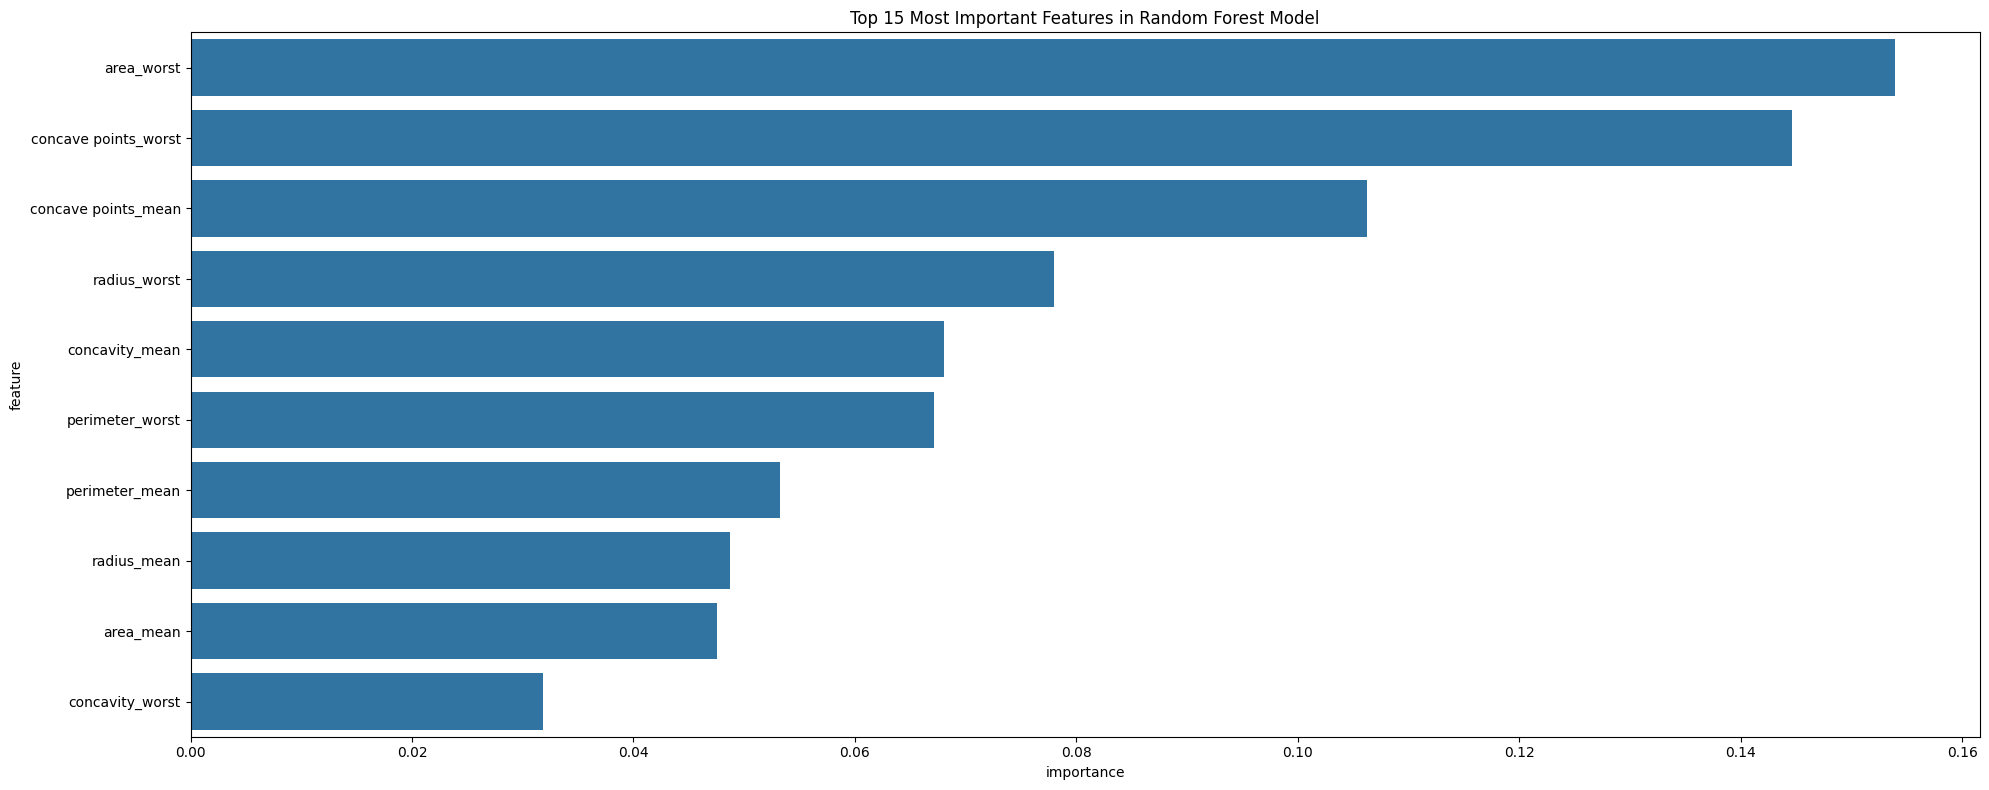

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert X_train from NumPy array to Pandas DataFrame
X_train_df = pd.DataFrame(X_train)

# Use X_train_df instead of X_train
feature_importance = pd.DataFrame({
    'feature': X_train_df.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(20, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 15 Most Important Features in Random Forest Model')
plt.tight_layout()
plt.show()

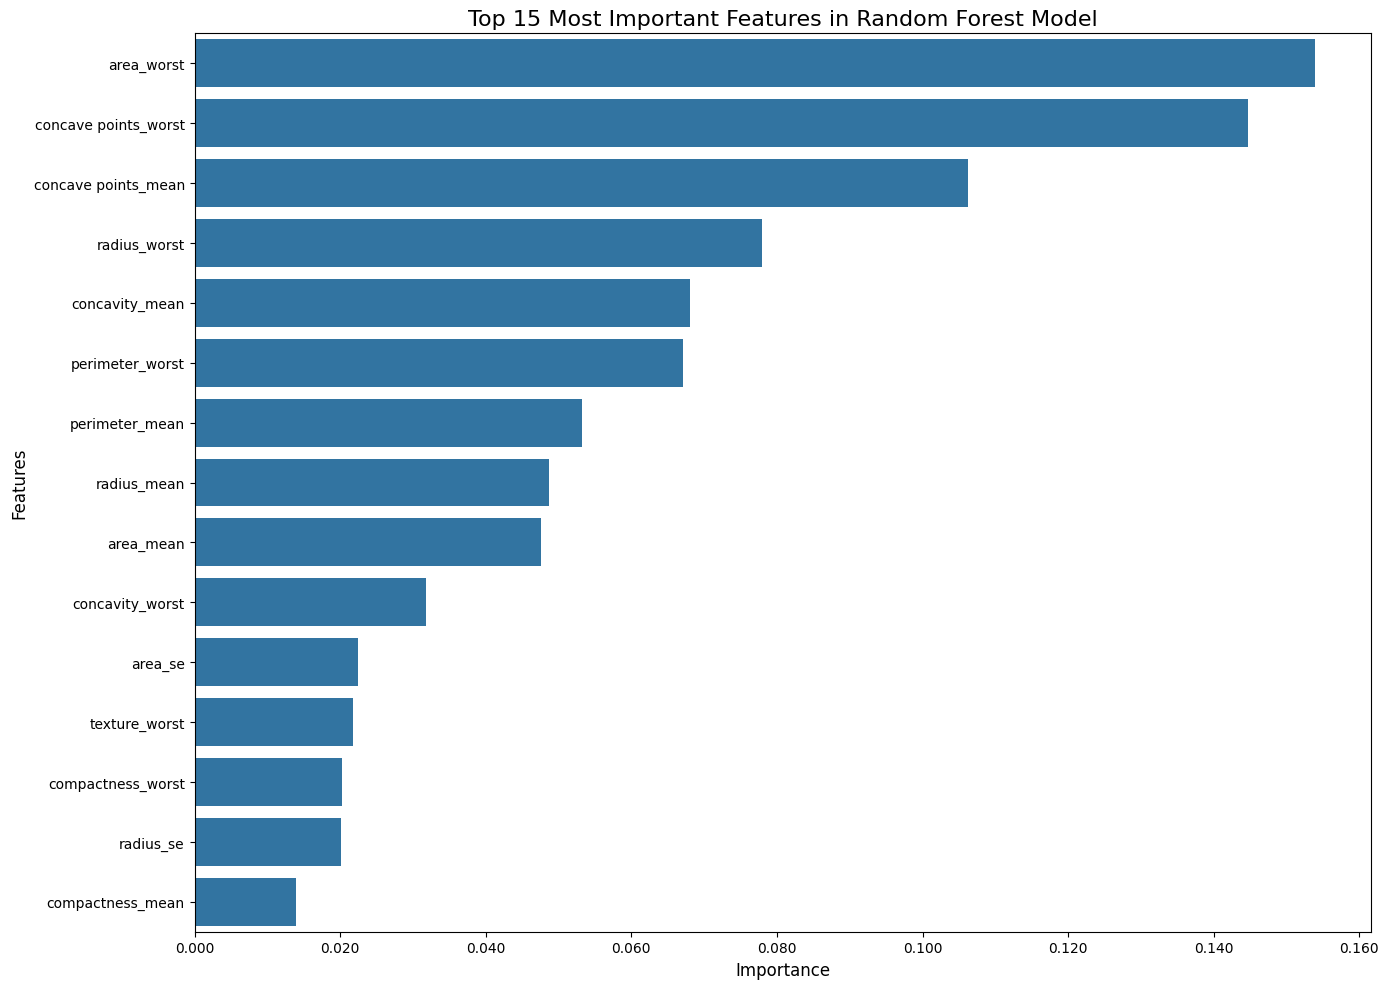

In [ ]:
# Define the feature names based on your dataset
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']

# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(14, 10))  # Increased figure size for better readability
ax = sns.barplot(x='importance', y='feature', data=feature_importance.head(15))

# Customize the plot
plt.title('Top 15 Most Important Features in Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Format x-axis to 3 decimal places
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))

# Adjust layout and display
plt.tight_layout()
plt.show()

<ipython-input-22-3872becf41a2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette=color_palette)


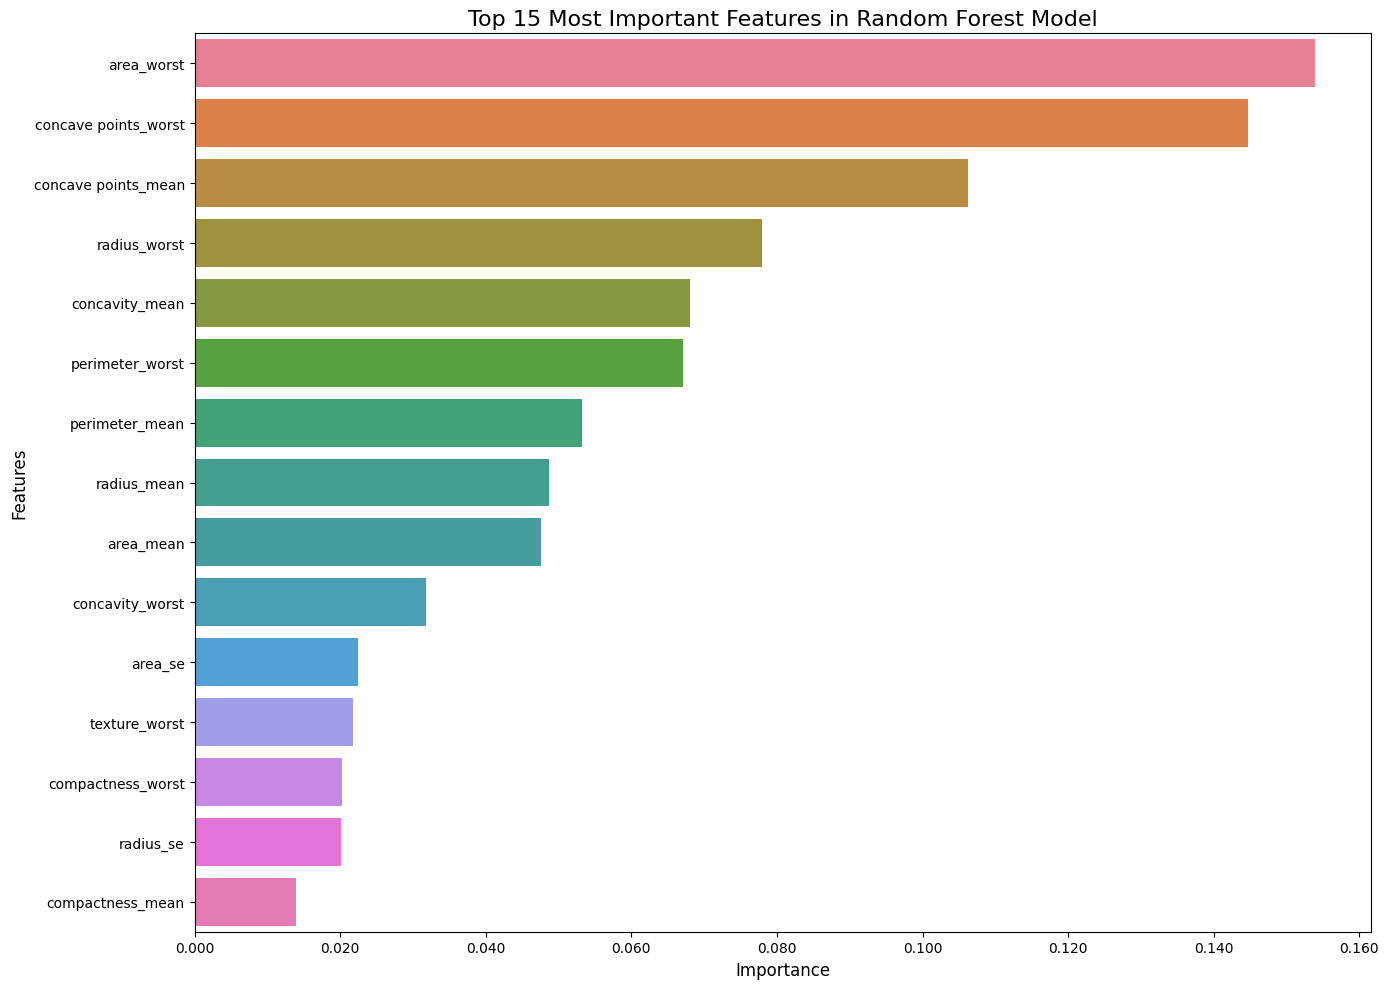

In [ ]:
# Define the feature names based on your dataset
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']

# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(14, 10))  # Increased figure size for better readability

# Use a color palette
color_palette = sns.color_palette("husl", 15)  # Generate 15 distinct colors

ax = sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette=color_palette)

# Customize the plot
plt.title('Top 15 Most Important Features in Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Format x-axis to 3 decimal places
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))

# Adjust layout and display
plt.tight_layout()
plt.show()


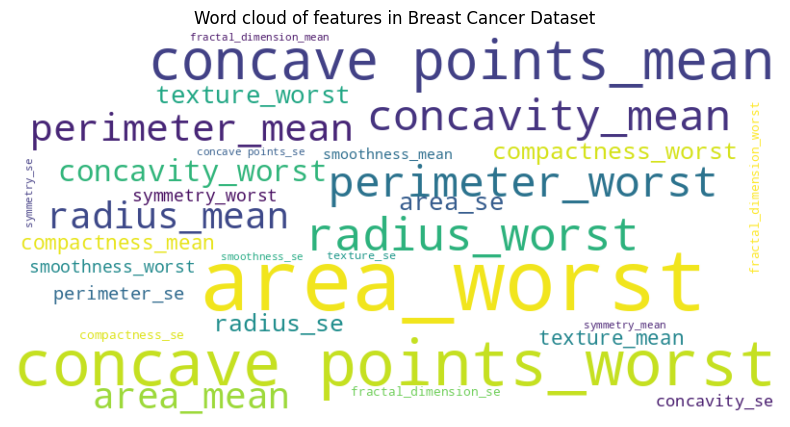

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the feature names based on your dataset
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']

# Assuming rf_model is your trained Random Forest model
# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Create a dictionary for the word cloud
word_freq = {row['feature']: row['importance'] for index, row in feature_importance.iterrows()}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word cloud of features in Breast Cancer Dataset')
plt.show()



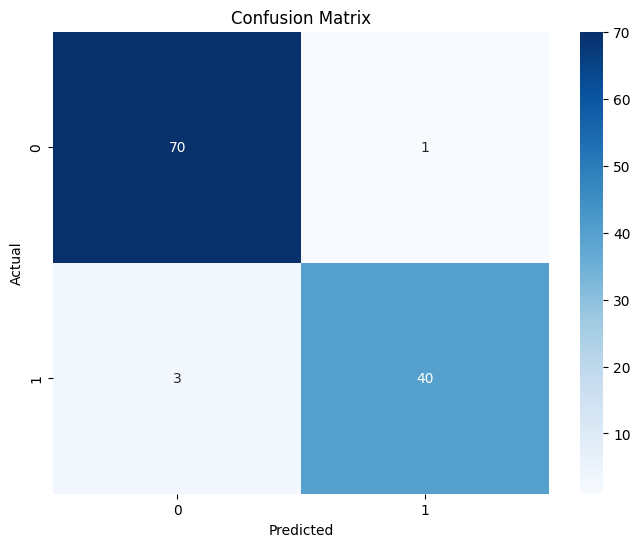

In [ ]:
# Confusion matrix
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

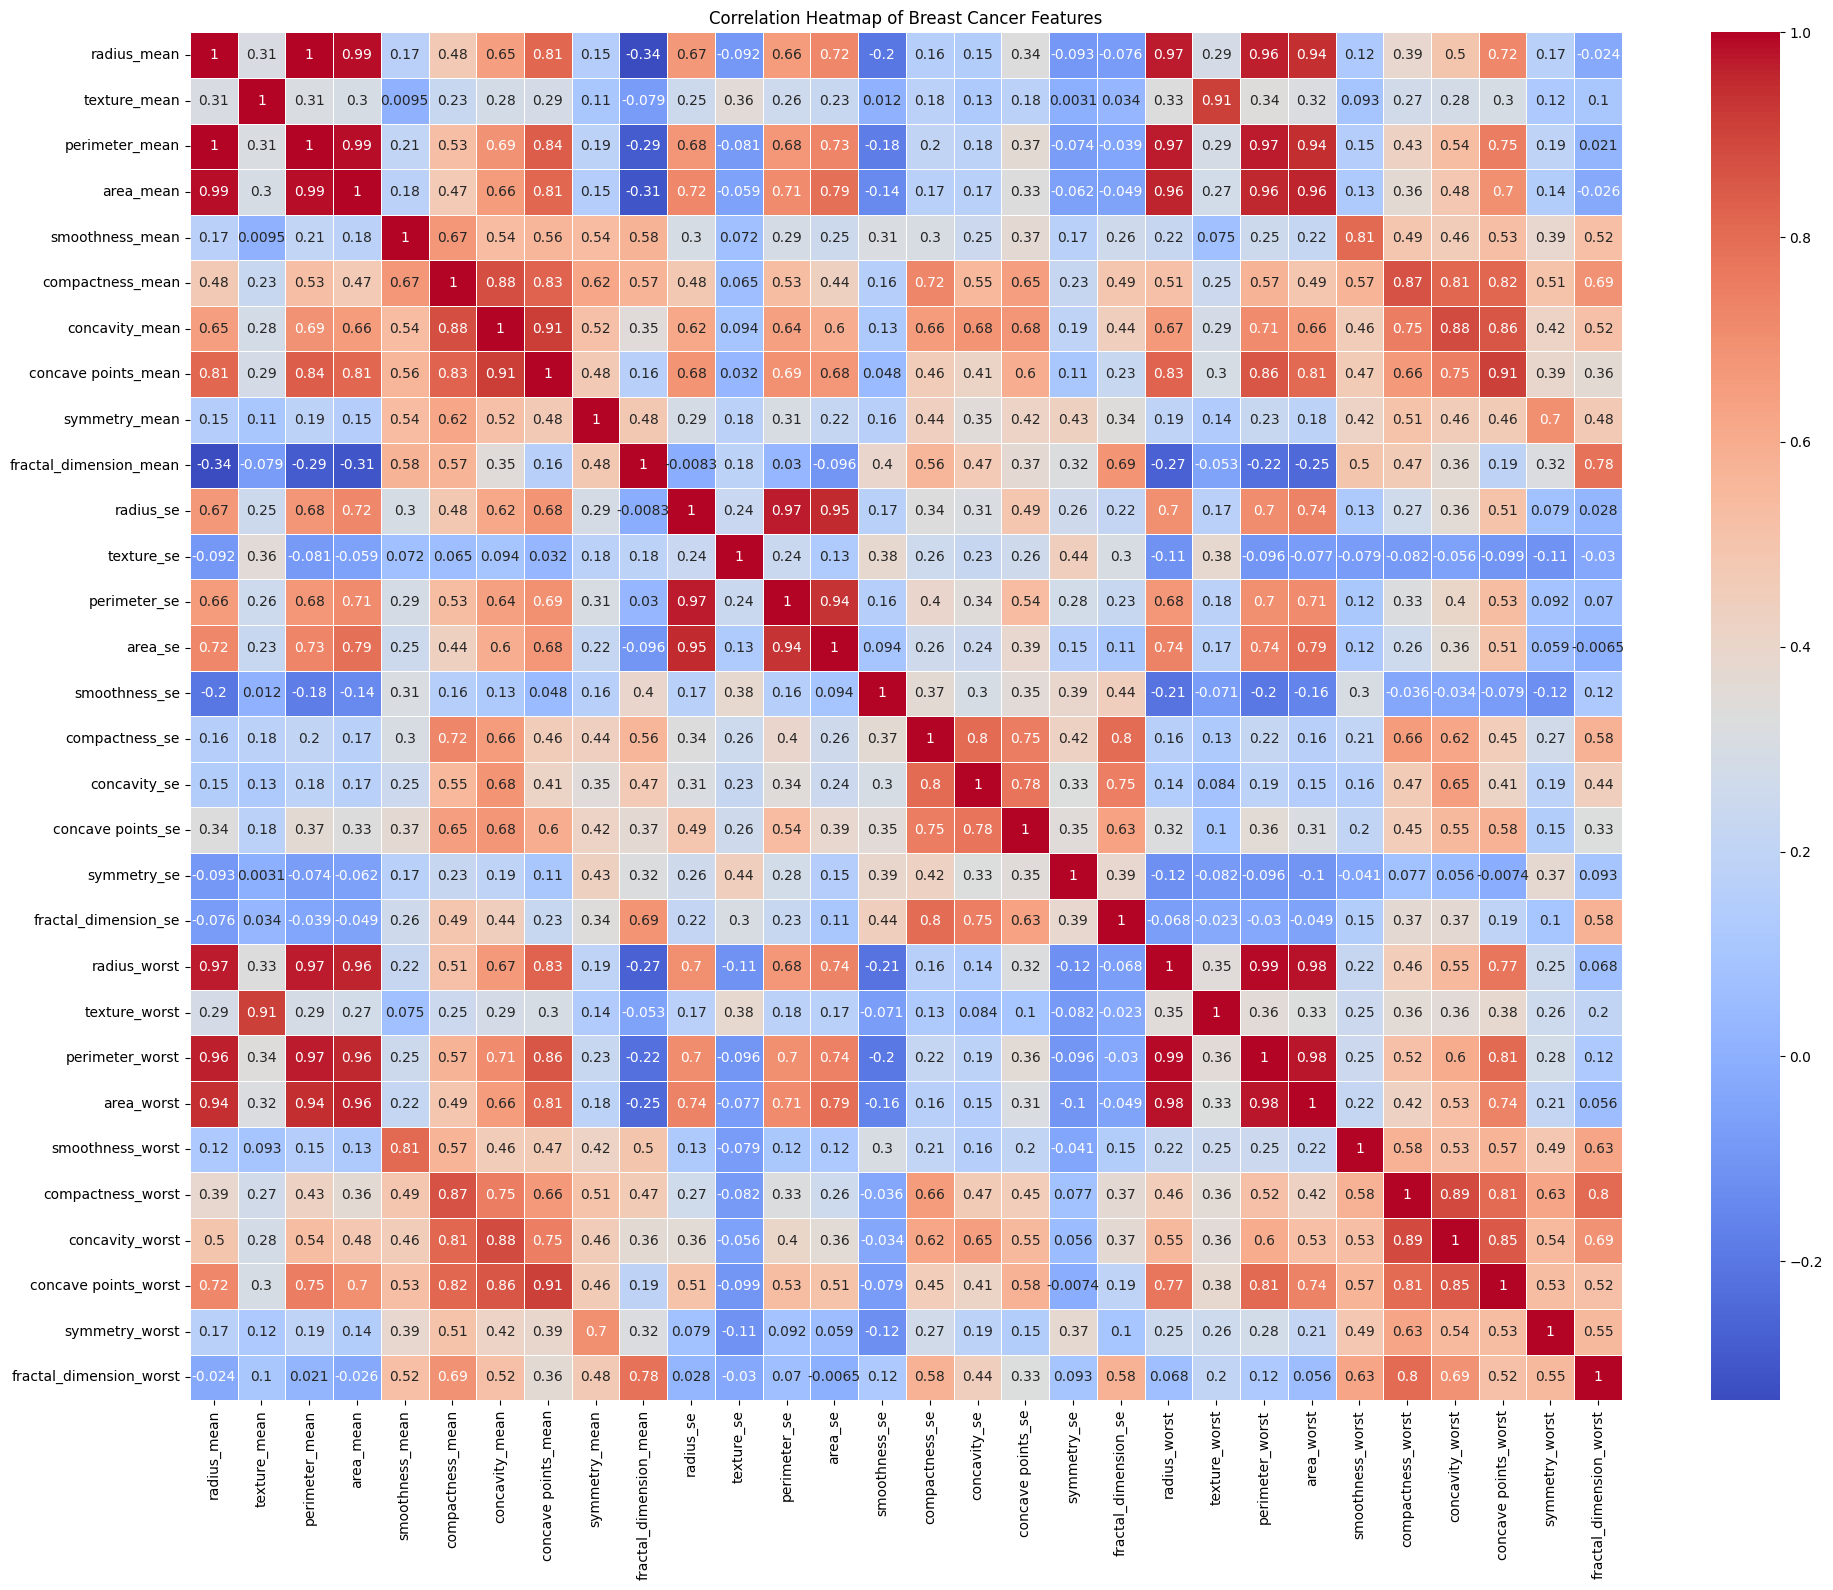

In [ ]:
# Convert X_train from NumPy array to pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                                            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                                            'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                                            'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                                            'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                                            'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                                            'symmetry_worst', 'fractal_dimension_worst'])

# Correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(X_train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.tight_layout()
plt.show()


### MLP

In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Prepare the target variable
y_train = y_train.map({'M': 1, 'B': 0})  # Map 'M' to 1 and 'B' to 0 for binary classification
y_test = y_test.map({'M': 1, 'B': 0})    # Ensure y_test is also mapped

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Build the MLP model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),  # Dropout layer for regularization
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),  # Dropout layer for regularization
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, predictions))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.5367 - loss: 0.6915 - val_accuracy: 0.9011 - val_loss: 0.4994
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8171 - loss: 0.5017 - val_accuracy: 0.9341 - val_loss: 0.3645
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9053 - loss: 0.3677 - val_accuracy: 0.9451 - val_loss: 0.2495
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9389 - loss: 0.2513 - val_accuracy: 0.9451 - val_loss: 0.1743
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9193 - loss: 0.2134 - val_accuracy: 0.9560 - val_loss: 0.1346
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9408 - loss: 0.1447 - val_accuracy: 0.9670 - val_loss: 0.1142
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9466 - loss: 0.1454 - val_accuracy: 0.9670 - val_loss: 0.1032
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9632 - loss: 0.1087 - val_accuracy: 0.95

In [ ]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
model.save('breast_cancer_model.h5')


In [ ]:
model = keras.models.load_model('breast_cancer_model.h5')


In [40]:
model = keras.models.load_model('/path/to/breast_cancer_model.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/path/to/breast_cancer_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# Load the model
model = keras.models.load_model('breast_cancer_model.h5')

# Load the scaler
scaler = StandardScaler()

st.title('Breast Cancer Prediction')

# Create input fields for features
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                 'fractal_dimension_mean']

input_data = {}
for feature in feature_names:
    input_data[feature] = st.number_input(f'Enter {feature}', value=0.0, format="%.6f")

if st.button('Predict'):
    # Prepare input data
    input_df = pd.DataFrame([input_data])

    # Scale the input data
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)[0][0]

    if prediction >= 0.5:
        st.error(f'The prediction indicates a high likelihood of malignant breast cancer. Probability: {prediction:.2%}')
    else:
        st.success(f'The prediction indicates a low likelihood of malignant breast cancer. Probability: {prediction:.2%}')

st.write('**Note:** This tool is for educational purposes only. Always consult with a medical professional for accurate diagnosis.')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'breast_cancer_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import pickle
from tensorflow import keras